<b> The following analysis explores different classification methods to predict which banking clients will be most likely to subscribe to a term deposit. Naive Bayes and Logistic Regression methods will be evaluated using the bank dataset with 4521 observations regarding client banking history. To evaluate the methods, a cross-validation design will be used and the area under the ROC curve will be used an index of classification performance. The analysis will use three binary, explanatory variables: default, housing, and loan to predict the success of certain clients accepting a term deposit from telephone marketing campaigns. </b>

In [1]:
# code from jump-start-bank-v003.py 
# seed value for random number generators to obtain reproducible results
RANDOM_SEED = 1

# ten-fold cross-validation specification
N_FOLDS = 10

# import base packages into the namespace for this program
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
from sklearn.naive_bayes import BernoulliNB
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import KFold

# initial work with the smaller data set
bank = pd.read_csv('bank.csv', sep = ';')  # start with smaller data set
# examine the shape of original input data
print(bank.shape)

(4521, 17)


In [4]:
# drop observations with missing data
bank.dropna()
# review the shape of input data after dropping missing data
print(bank.shape)

(4521, 17)


In [5]:
# look at the list of column names, y is the response
list(bank.columns.values)

['age',
 'job',
 'marital',
 'education',
 'default',
 'balance',
 'housing',
 'loan',
 'contact',
 'day',
 'month',
 'duration',
 'campaign',
 'pdays',
 'previous',
 'poutcome',
 'response']

In [7]:
# look at first five rows of DataFrame
bank.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,response
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no


In [9]:
# code from jump-start-bank-v003.py 
# mapping function to convert text no/yes to integer 0/1
convert_to_binary = {'no' : 0, 'yes' : 1}

# define binary variable for having credit in default
default = bank['default'].map(convert_to_binary)

# define binary variable for having a mortgage or housing loan
housing = bank['housing'].map(convert_to_binary)

# define binary variable for having a personal loan
loan = bank['loan'].map(convert_to_binary)

# define response variable to use in the model
response = bank['response'].map(convert_to_binary)

In [10]:
# Use three binary explanatory variables relating to client banking history:
# default, housing, and loan
# use .T to transpose for appropriate structure
model_data = np.array([np.array(default), np.array(housing), np.array(loan), 
    np.array(response)]).T

In [11]:
# examine the shape of model_data, which we will be used for modeling
print(model_data.shape)

# the rest of the program should set up the modeling methods
# and evaluation within a cross-validation design

(4521, 4)


In [ ]:
>>> import numpy as np
>>> X = np.random.randint(2, size=(6, 100))
>>> Y = np.array([1, 2, 3, 4, 4, 5])
>>> from sklearn.naive_bayes import BernoulliNB
>>> clf = BernoulliNB()
>>> clf.fit(X, Y)
BernoulliNB(alpha=1.0, binarize=0.0, class_prior=None, fit_prior=True)
>>> print(clf.predict(X[2:3]))

In [12]:
# Code from evaluate-regression-methods-v001.py
# running Naive Bayes and Logistic re
names = ["Naive_Bayes", "Logistic_Regression"]
classifiers = [BernoulliNB(alpha=1.0, binarize=0.5, 
                           class_prior = [0.5, 0.5], fit_prior=False), 
               LogisticRegression(solver='liblinear')]

# dimensions of the additive model X input and y response
print('\nData dimensions:', model_data.shape)




Data dimensions: (4521, 4)


In [13]:
# set up numpy array for storing results
cv_results = np.zeros((N_FOLDS, len(names)))

In [17]:
kf = KFold(n_splits = N_FOLDS, shuffle=False, random_state = RANDOM_SEED)
# check the splitting process by looking at fold observation counts
index_for_fold = 0  # fold count initialized 
for train_index, test_index in kf.split(model_data):
    print('\nFold index:', index_for_fold,
          '------------------------------------------')
#   note that 0:model_data.shape[1]-1 slices for explanatory variables
#   and model_data.shape[1]-1 is the index for the response variable    
    X_train = model_data[train_index, 0:model_data.shape[1]-1]
    X_test = model_data[test_index, 0:model_data.shape[1]-1]
    y_train = model_data[train_index, model_data.shape[1]-1]
    y_test = model_data[test_index, model_data.shape[1]-1]   
    print('\nShape of input data for this fold:',
       '\nData Set: (Observations, Variables)')
    print('X_train:', X_train.shape)
    print('X_test:',X_test.shape)
    print('y_train:', y_train.shape)
    print('y_test:',y_test.shape)
    
    index_for_method = 0  # initialize
    for name, clf in zip(names, classifiers):
        print('\nClassifier evaluation for:', name)
        print('  Scikit Learn method:', clf)
        clf.fit(X_train, y_train)  # fit on the train set for this fold
        # evaluate on the test set for this fold
        y_test_predict = clf.predict_proba(X_test)
        fold_method_result = roc_auc_score(y_test, y_test_predict[:,1]) 
        print('Area under ROC curve:', fold_method_result)
        cv_results[index_for_fold, index_for_method] = fold_method_result
        index_for_method += 1
  
    index_for_fold += 1

cv_results_df = pd.DataFrame(cv_results)
cv_results_df.columns = names




Fold index: 0 ------------------------------------------

Shape of input data for this fold: 
Data Set: (Observations, Variables)
X_train: (4068, 3)
X_test: (453, 3)
y_train: (4068,)
y_test: (453,)

Classifier evaluation for: Naive_Bayes
  Scikit Learn method: BernoulliNB(alpha=1.0, binarize=0.5, class_prior=[0.5, 0.5], fit_prior=False)
Area under ROC curve: 0.5878522062732588

Classifier evaluation for: Logistic_Regression
  Scikit Learn method: LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='liblinear',
          tol=0.0001, verbose=0, warm_start=False)
Area under ROC curve: 0.5878522062732588

Fold index: 1 ------------------------------------------

Shape of input data for this fold: 
Data Set: (Observations, Variables)
X_train: (4069, 3)
X_test: (452, 3)
y_train: (4069,)
y_test: (452,)

Classifier evaluation for: Naive_Bayes

In [39]:

#####THIS TRIES TOMPLOT ROC CURVES

kf = KFold(n_splits = N_FOLDS, shuffle=False, random_state = RANDOM_SEED)
# check the splitting process by looking at fold observation counts
index_for_fold = 0  # fold count initialized 
for train_index, test_index in kf.split(model_data):
    print('\nFold index:', index_for_fold,
          '------------------------------------------')
#   note that 0:model_data.shape[1]-1 slices for explanatory variables
#   and model_data.shape[1]-1 is the index for the response variable    
    X_train = model_data[train_index, 0:model_data.shape[1]-1]
    X_test = model_data[test_index, 0:model_data.shape[1]-1]
    y_train = model_data[train_index, model_data.shape[1]-1]
    y_test = model_data[test_index, model_data.shape[1]-1]   
    print('\nShape of input data for this fold:',
       '\nData Set: (Observations, Variables)')
    print('X_train:', X_train.shape)
    print('X_test:',X_test.shape)
    print('y_train:', y_train.shape)
    print('y_test:',y_test.shape)
    
    index_for_method = 0  # initialize
    for name, clf in zip(names, classifiers):
        print('\nClassifier evaluation for:', name)
        print('  Scikit Learn method:', clf)
        clf.fit(X_train, y_train)  # fit on the train set for this fold
        # evaluate on the test set for this fold
        y_test_predict = clf.predict_proba(X_test)
        fold_method_result = roc_auc_score(y_test, y_test_predict[:,1]) 
        print('Area under ROC curve:', fold_method_result)
        cv_results[index_for_fold, index_for_method] = fold_method_result
        fpr, tpr, thresholds = roc_curve(y_test, y_test_predict[:,1])
        def plot_roc_curve(fpr, tpr, label= None):
            plt.plot(fpr, tpr, linewidth=2, label=label)
            plt.plot([0,1],[0,1], 'k--')
            plt.axis([0,1,0,1])
            plt.xlabel('False Positive Rate')
            plt.ylabel('True Positive Rate')
            index_for_method += 1
            graph = plot_roc_curve(fpr,tpr)
            print(graph)
        

    index_for_fold += 1

cv_results_df = pd.DataFrame(cv_results)
cv_results_df.columns = names




Fold index: 0 ------------------------------------------

Shape of input data for this fold: 
Data Set: (Observations, Variables)
X_train: (4068, 3)
X_test: (453, 3)
y_train: (4068,)
y_test: (453,)

Classifier evaluation for: Naive_Bayes
  Scikit Learn method: BernoulliNB(alpha=1.0, binarize=0.5, class_prior=[0.5, 0.5], fit_prior=False)
Area under ROC curve: 0.5878522062732588

Classifier evaluation for: Logistic_Regression
  Scikit Learn method: LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='liblinear',
          tol=0.0001, verbose=0, warm_start=False)
Area under ROC curve: 0.5878522062732588

Fold index: 1 ------------------------------------------

Shape of input data for this fold: 
Data Set: (Observations, Variables)
X_train: (4069, 3)
X_test: (452, 3)
y_train: (4069,)
y_test: (452,)

Classifier evaluation for: Naive_Bayes

In [18]:
print('\n----------------------------------------------')
print('Average results from ', N_FOLDS, '-fold cross-validation\n',
      '\nMethod                 Area under ROC Curve', sep = '')     
print(cv_results_df.mean())   


----------------------------------------------
Average results from 10-fold cross-validation

Method                 Area under ROC Curve
Naive_Bayes            0.611060
Logistic_Regression    0.611733
dtype: float64


The area under the ROC curve is a good measure for how accurately the models are classifying predictions. Higher values generally indicate a better classification method. In this instance, both the Naive Bayes and Logistic Regression have fairly close area under the curve values. However, the Naive Bayes method for classification appears to be a better method due to the higher area under the curve value (.611060) of the methods evaluated. I would recommend that management leverage Naive Bayes method of classification in the future. 

In [27]:
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_test, y_test_predict[:,1])

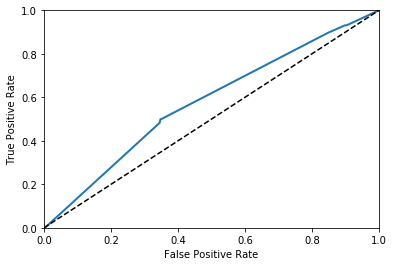

In [30]:
def plot_roc_curve(fpr, tpr, label= None):
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0,1],[0,1], 'k--')
    plt.axis([0,1,0,1])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    
plot_roc_curve(fpr,tpr)
plt.show()

In [52]:
# Understand which group of banking clients appears to be the best target
# for direct marketing efforts to subscribe to a term deposit
# Set-up target groups
default_status = np.array([1, 1, 1, 1, 0, 0, 0, 0], np.int32)
housing_status = np.array([1, 1, 0, 0, 1, 1, 0, 0], np.int32)
loan_status = np.array([1, 0, 1, 0, 1, 0, 1, 0], np.int32)

# use .T to transpose for appropriate structure
my_X_test = np.vstack([default_status, housing_status, loan_status]).T

# fit Naive Bayes to full data set
clf = BernoulliNB(alpha=1.0, binarize=0.5, class_prior = [0.5, 0.5], fit_prior=False)
X_train = model_data[:, 0:model_data.shape[1]-1]
y_train = model_data[:, model_data.shape[1]-1]
clf.fit(X_train, y_train)

# predict specific test cases
y_my_test_predict = clf.predict_proba(my_X_test)

# create DataFrame for displaying test cases and predicted probabilities
my_targeting_df = pd.DataFrame(np.hstack([my_X_test, y_my_test_predict]))
my_targeting_df.columns = ['default', 'housing', 'loan', 
                           'predict_NO', 'predict_YES']
print('\n\nNaive Bayes predictions for test cases')
print('\n------------------------------------------------------')
print(my_targeting_df) 

# for targeting, select group(s) with highest predicted probabiliy 
# of responding to the promotional mailers



Naive Bayes predictions for test cases

------------------------------------------------------
   default  housing  loan  predict_NO  predict_YES
0      1.0      1.0   1.0    0.703288     0.296712
1      1.0      1.0   0.0    0.529384     0.470616
2      1.0      0.0   1.0    0.551965     0.448035
3      1.0      0.0   0.0    0.368951     0.631049
4      0.0      1.0   1.0    0.727746     0.272254
5      0.0      1.0   0.0    0.559193     0.440807
6      0.0      0.0   1.0    0.581473     0.418527
7      0.0      0.0   0.0    0.397353     0.602647


The Naive Bayes method classifies customers who are predicted to subscribe or not subscribe to a term deposit. According the results table, the group of banking clients that appear to be the best target for direct marketing efforts are the clients who have credit in default and do not have a housing or a personal loan.  It is predicted that 63% of this group will subscribe to a term deposit. Another group for direct marketing that should be given consideration if budget exists, are the clients who do not have credit in default nor do they have a housing or personal loan. It is predicted that 60% of these clients will subscribe to a term deposit. These two groups of clients have the best predicted rate over the other groups by about .13.